<a href="https://colab.research.google.com/github/Francesfahey/forecastingCA/blob/main/FORECASTINGCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Brief
For the seasonal data we used carbon dioxide levels in Hawaii. The CO2 levels in Hawaii, specifically at Mauna Loa, rise and fall on a seasonal cycle due to natural processes related to the Earth's carbon cycle. During the Northern Hemisphere winter, plants and trees release less oxygen as they go through a dormant period, and therefore absorb less CO2 from the atmosphere through photosynthesis. This results in higher CO2 levels in the atmosphere. During the Northern Hemisphere summer, when plants and trees are actively growing, they absorb more CO2 through photosynthesis, which leads to a decrease in atmospheric CO2 levels.

However, the long-term trend of increasing atmospheric CO2 levels is primarily due to human activities, particularly the burning of fossil fuels and deforestation. The release of greenhouse gases from these activities traps more heat in the Earth's atmosphere, leading to global warming and climate change.

# Project information
Data cleaning and preprocessing: Preprocessed data into a pandas DataFrame and plot the CO2 levels over time.

Naive seasonal method: Calculate a naive seasonal method for forecasting CO2 levels, which involves using the value from the same time period in the previous year as the forecast for the current year.

ARIMA modeling: You use an ARIMA model to forecast CO2 levels. Fit a SARIMA (seasonal ARIMA) model to the data using the optimize_SARIMA function defined. This function tests a range of possible hyperparameters for the model and returns the model with the lowest AIC, which is a measure of the model's goodness of fit. Tested data (the last 12 months of CO2 levels) and calculate the mean squared error (MSE) between the predicted and actual values.

Results: Plotted the actual CO2 levels for the test period, along with the forecasts from the naive seasonal method and the SARIMA model. Calculated and printed the AIC and MSE for the SARIMA model.

# Code

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Francesfahey/forecastingCA/main/archive.csv')

# show top records in the df
df.head

<bound method NDFrame.head of     Month  Carbon Dioxide (ppm)
0       0                319.44
1       1                320.44
2       2                320.89
3       3                322.14
4       4                322.16
5       5                321.87
6       6                321.21
7       7                318.87
8       8                317.82
9       9                317.30
10     10                318.87
11     11                319.42
12     12                320.62
13     13                321.59
14     14                322.39
15     15                323.70
16     16                324.08
17     17                323.75
18     18                322.39
19     19                320.36
20     20                318.64
21     21                318.10
22     22                319.79
23     23                321.03
24     24                322.32
25     25                322.50
26     26                323.04
27     27                324.42
28     28                325.00
29     29 

This code is creating a line plot of monthly carbon dioxide levels in Hawaii using the matplotlib library in Python.

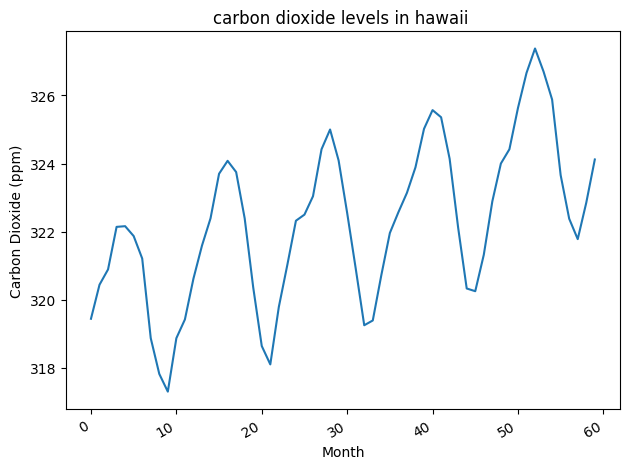

<Figure size 640x480 with 0 Axes>

In [ ]:

fig = plt.figure()
plt.plot(df.Month, df['Carbon Dioxide (ppm)'])

plt.title('carbon dioxide levels in hawaii ')
plt.xlabel('Month')
plt.ylabel('Carbon Dioxide (ppm)')

plt.xticks(rotation = 100, ha='right')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
plt.savefig('CO2_levels.png', dpi=300)

This code is creating a line plot of monthly carbon dioxide levels in Hawaii, with vertical lines indicating the start of each year. 

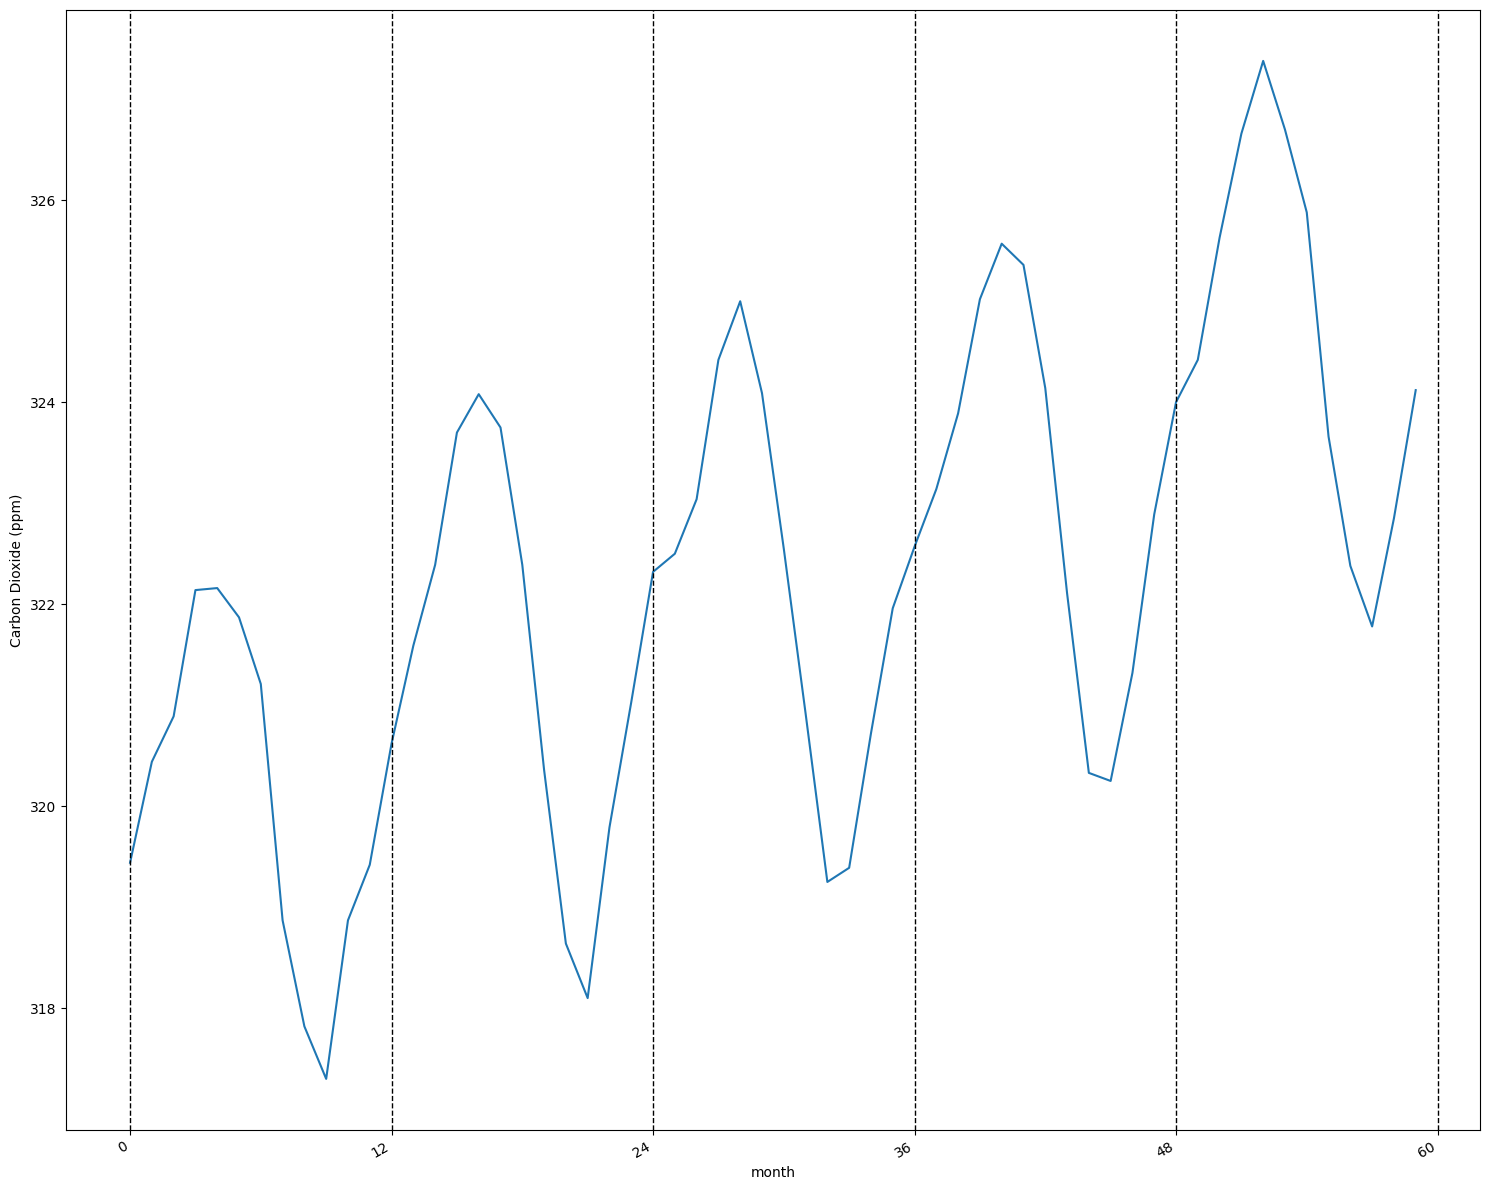

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))

ax.plot(df['Month'], df['Carbon Dioxide (ppm)'])
for i in np.arange(0, 70, 12):
    ax.axvline(x=i, linestyle='--', color='black', linewidth=1)
ax.set_xlabel('month')
ax.set_ylabel('Carbon Dioxide (ppm)')

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_seasonal.png', dpi=300)

This code is performing a seasonal decomposition of the monthly carbon dioxide levels in Hawaii using the STL decomposition method and plotting the resulting components.

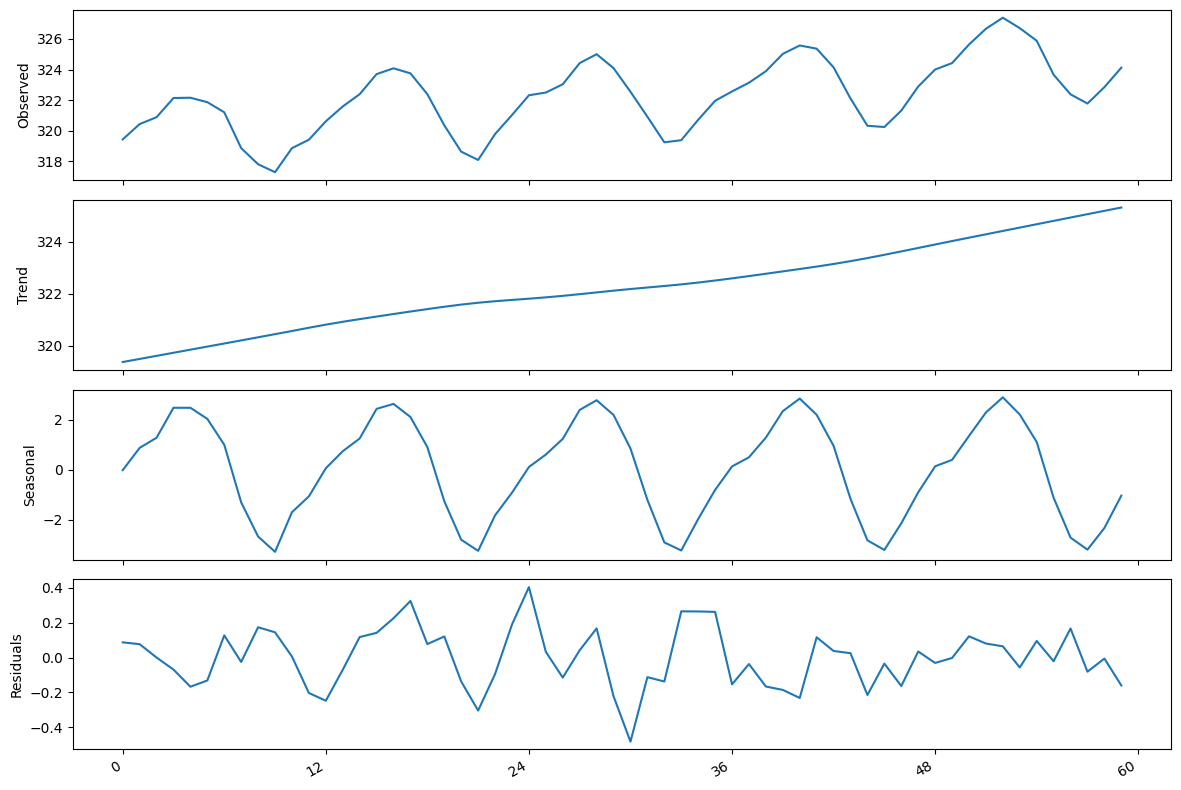

In [ ]:
decomposition = STL(df['Carbon Dioxide (ppm)'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_decomp.png', dpi=300)

This code is creating a linear time series, performing a seasonal decomposition using the STL method, and plotting the resulting components.

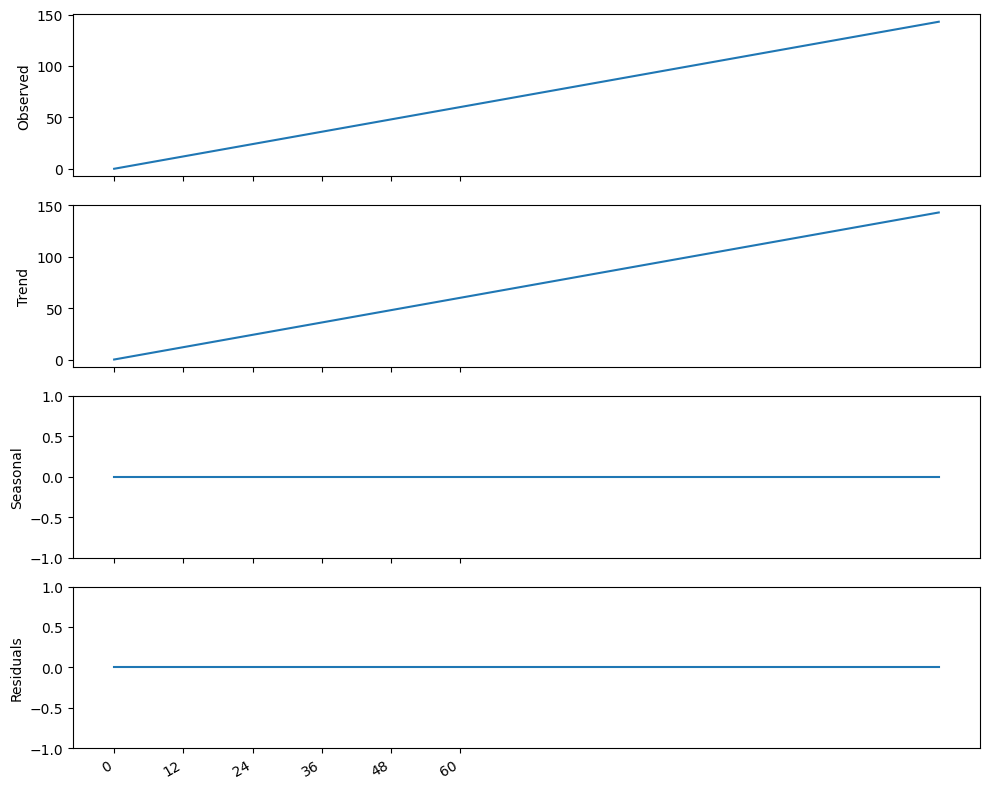

In [ ]:
linear_ts = np.arange(0, 144, 1)

decomposition = STL(linear_ts, period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax3.set_ylim(-1, 1)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
ax4.set_ylim(-1, 1)

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_residuals.png', dpi=300)

In [ ]:
ADF_result = adfuller(df['Carbon Dioxide (ppm)'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: 0.7740843354627819
p-value: 0.991206111812789


The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine if a time series is stationary or not. The null hypothesis of the test is that the time series is non-stationary, which means it has a unit root, while the alternative hypothesis is that the time series is stationary, which means it does not have a unit root.

In this case, the ADF statistic is 0.7741, and the p-value is 0.9912. The ADF statistic is a negative number, which means the time series has a chance of being stationary. However, the p-value is greater than 0.05, which means we fail to reject the null hypothesis of non-stationarity. This suggests that the carbon dioxide time series is likely non-stationary, and further analysis and transformations may be needed to make it stationary.

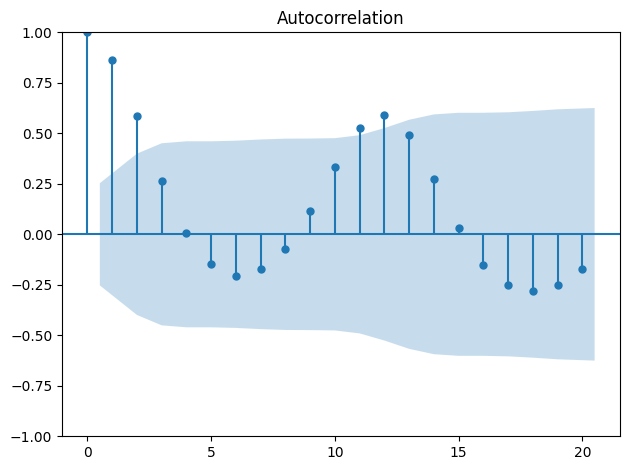

In [ ]:
plot_acf(df['Carbon Dioxide (ppm)'], lags=20);

plt.tight_layout()
plt.savefig('fig_CO2_1.png', dpi=300)

The ACF plot shows the correlation between the time series and its lagged values. The lag represents the time difference between the observations being compared. The ACF plot can be used to determine if the time series is stationary or not, and if it has any autocorrelation.

If the ACF plot shows a gradual decay in the correlation coefficients as the lag increases, it suggests that the time series is likely stationary. If the plot shows a slow decay or no decay at all, it suggests that the time series is non-stationary.

The plot can also show if the time series has any seasonality or periodicity. If there are significant spikes at certain lags, it suggests that there is some pattern or seasonality in the data.

In [ ]:
C02_diff = np.diff(df['Carbon Dioxide (ppm)'], n=1)
print(C02_diff)

[ 1.    0.45  1.25  0.02 -0.29 -0.66 -2.34 -1.05 -0.52  1.57  0.55  1.2
  0.97  0.8   1.31  0.38 -0.33 -1.36 -2.03 -1.72 -0.54  1.69  1.24  1.29
  0.18  0.54  1.38  0.58 -0.91 -1.54 -1.63 -1.67  0.14  1.33  1.24  0.61
  0.57  0.75  1.13  0.55 -0.21 -1.22 -2.03 -1.78 -0.08  1.07  1.57  1.11
  0.42  1.21  1.03  0.72 -0.68 -0.82 -2.22 -1.28 -0.6   1.07  1.27]


The C02_diff variable contains the first difference of the Carbon Dioxide (ppm) data, which is obtained by taking the difference between each value in the series and its preceding value.

In [ ]:
ADF_result = adfuller(C02_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.5824632724892767
p-value: 0.09667619014146644


The ADF statistic is -2.58 and the p-value is 0.097. The p-value is greater than the significance level of 0.05, which means that we fail to reject the null hypothesis that the series has a unit root, and conclude that the series is non-stationary.


In [ ]:
C02_diff2 = np.diff(df['Carbon Dioxide (ppm)'], n=2)
print(C02_diff)

[ 1.    0.45  1.25  0.02 -0.29 -0.66 -2.34 -1.05 -0.52  1.57  0.55  1.2
  0.97  0.8   1.31  0.38 -0.33 -1.36 -2.03 -1.72 -0.54  1.69  1.24  1.29
  0.18  0.54  1.38  0.58 -0.91 -1.54 -1.63 -1.67  0.14  1.33  1.24  0.61
  0.57  0.75  1.13  0.55 -0.21 -1.22 -2.03 -1.78 -0.08  1.07  1.57  1.11
  0.42  1.21  1.03  0.72 -0.68 -0.82 -2.22 -1.28 -0.6   1.07  1.27]


In [ ]:
ADF_result = adfuller(C02_diff2)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -12.346652177769334
p-value: 5.951525041033767e-23


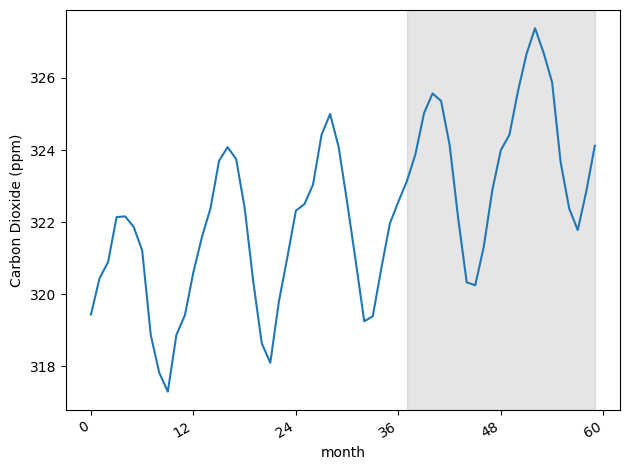

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Carbon Dioxide (ppm)'])
ax.set_xlabel('month')
ax.set_ylabel('Carbon Dioxide (ppm)')
ax.axvspan(37, 59, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 61, 12), np.arange(0, 61, 12))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('fig_train.png', dpi=300)

In [ ]:
def optimize_ARIMA(train, order_list, d) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(train, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
def optimize_SARIMA(train, order_list, d, D, s) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                train, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

These functions are used to optimize the ARIMA and SARIMA models by iterating through a list of possible orders and finding the order with the lowest AIC (Akaike information criterion) score. The AIC score is a measure of how well the model fits the data while taking into account the number of parameters in the model. Lower AIC scores indicate a better fit.

In [ ]:
ps = range(0, 13, 1)
qs = range(0, 13, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

train = df['Carbon Dioxide (ppm)'][:-12]

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/169 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(12, 1, 0, 0)",70.183654
1,"(11, 2, 0, 0)",70.312317
2,"(11, 3, 0, 0)",71.043271
3,"(11, 1, 0, 0)",71.126496
4,"(11, 4, 0, 0)",71.130545
...,...,...
150,"(9, 11, 0, 0)",270189.205164
151,"(10, 11, 0, 0)",270191.208225
152,"(11, 11, 0, 0)",270193.188556
153,"(12, 11, 0, 0)",270195.142709


In [ ]:
SARIMA_model = SARIMAX(train, order=(2,1,1), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                    Carbon Dioxide (ppm)   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 -12.743
Date:                                 Mon, 08 May 2023   AIC                             39.486
Time:                                         20:07:00   BIC                             50.374
Sample:                                              0   HQIC                            43.245
                                                  - 48                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4397      0.290      1.517      0.129      -0.128       1

In [14]:
ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

print(ARIMA_model_fit.summary())

ValueError: ignored

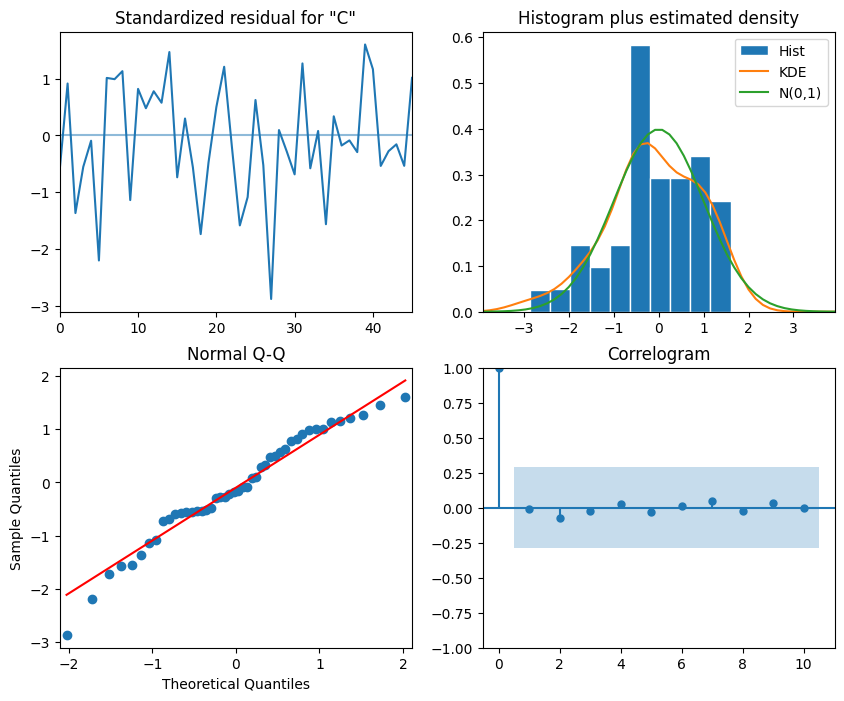

In [ ]:
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('results.png', dpi=300)

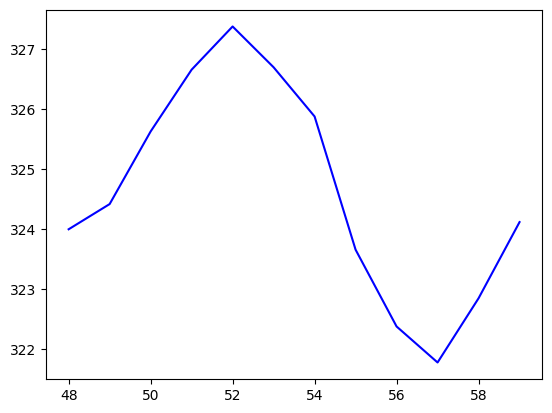

In [11]:
fig, ax = plt.subplots()

train = df.iloc[:-12]
test = df.iloc[-12:]

ax.plot(test['Month'], test['Carbon Dioxide (ppm)'], 'b-', label='actual')

In [13]:
residuals = ARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

NameError: ignored

KeyError: ignored

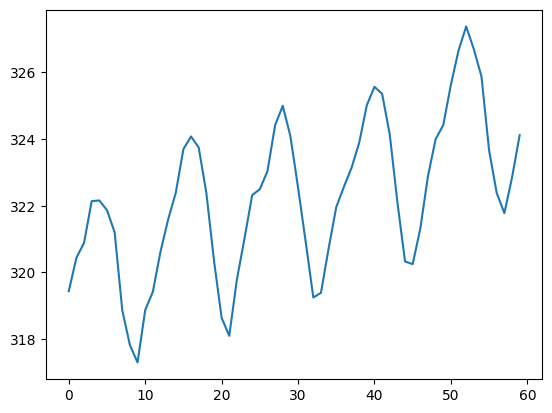

In [12]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Carbon Dioxide (ppm)'])
ax.plot(test.index, test['actual'], 'b-', label='actual')
ax.plot(test.index, test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test.index, test['ARIMA_pred'], 'k--', label='ARIMA(12,2,12)')

ax.set_xlabel('Month')
ax.set_ylabel('Carbon Dioxide (ppm)')
ax.axvspan(test.index[0], test.index[-1], color='#808080', alpha=0.2)

ax.legend(loc=2)

plt.xticks(np.arange(df.index[0], test.index[-1], 24), rotation=45)
ax.set_xlim(test.index[0]-24, test.index[-1]+24)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/ARIMA_forecast.png', dpi=300)


In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(132, 143).predicted_mean
test ['SARIMA_pred'] = SARIMA_pred
test = pd.DataFrame()